
**User Churn Prediction**

target:

In this project, I will use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, we will analyze top factors that influence user retention.

models include:

1.   Logistic Regression
2.   Polynomial Logistic Regrerssion
3.   Random Forest
4.   Support Vector Machine

Results:
the logostic regression has the best performance on the recall score and scorced at 1, which means the model can find all the churned customer on the test dateset in cost of lossing precession. In this case, we are more care about the recall rate because the churned customer will reduce the profit but the customers who are not going to churn but be cogonized as going to churn will not hurt a lot on profit.
the feature importance shows the larger 'number_customer_service_calls' and 'intl_plan' are, the higher posibility the customer will churn the service. One intereting thing is the feature importance shows customer with 'voice_mail_plan' trends not to churn the service.

Suggestion:


1.   We should pay more attention on the customers who always call to the customer service.
2.   The feature importance shows the cutsomer with 'intl_plan' has higer prosibility to churn, so we need to see if our "intl_plan" has any problem.
3.   We need to increase the precentage of the customers with "voice_mail_plan", because this group of people has the lowest rate of churn.




**Data Imports**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1JczT5KaTncUy0GabzoRAEfcvjFPQSYF2'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id})
file.GetContentFile('churn.all')  

In [7]:
df0 = pd.read_csv('churn.all')
df0.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [9]:
df0.shape

(5000, 21)

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [0]:
df1 = df0.copy()

In [0]:
df1['voice_mail_plan'] = np.where(df1['voice_mail_plan'] == ' yes',True,False)
df1['intl_plan'] = np.where(df1['intl_plan'] == ' yes',True,False)
df1['churned'] = np.where(df1['churned'] == ' True.',True,False)

In [84]:
df1.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                           bool
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

drop same features such as phone number which is useless feature

In [85]:
df1.drop(columns=['area_code','phone_number'])

,state,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,False,True,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,False,False,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,False,False,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,False,False,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


see the coralation between feature and feature

conclusion: the features are not high corelated

In [0]:
columns_name = ["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]

In [0]:
corr = df1[columns_name].corr()

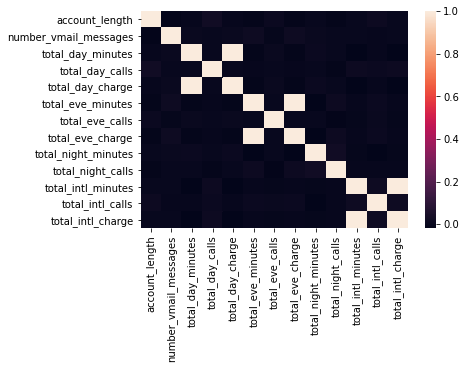

In [79]:
import seaborn as sns
sns.heatmap(corr)

check whether the dataset is skewed or not

true/all = 707/5000 = 14%

so the data is nopt very skewed

In [0]:
from collections import Counter
counter = Counter(df1['churned'])

In [87]:
counter

Counter({False: 4293, True: 707})

one hot encoding

In [91]:
df2 = pd.get_dummies(df1,columns=['state'])
df2.head()

,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
df2.shape

(5000, 71)

train test split and standardization

In [0]:
y = df2['churned'].copy()

In [0]:
X = df2.drop(['area_code','phone_number','churned'],axis=1)

In [100]:
X

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,False,True,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,152,False,False,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4997,61,False,False,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4998,109,False,False,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [107]:
print("X_train shape is ", X_train.shape)
print("y_train shape is ", y_train.shape)
print("X_test shape is ", X_test.shape)
print("y_test shape is ",y_test.shape)

X_train shape is  (4000, 68)
y_train shape is  (4000,)
X_test shape is  (1000, 68)
y_test shape is  (1000,)


**Model Selection and Train**

In [108]:
#@title build models (logistic Reregssion)
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
log_clf.score(X_test,y_test)


0.144

In [111]:
x
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.375

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test,y_test)

0.263

In [114]:
from sklearn.linear_model import SGDClassifier
svm_clf = SGDClassifier()
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.144

In [117]:
from sklearn import model_selection
model_names = ['Logistic Regression','KNN','Random Forest','SVM']
model_list = [log_clf, knn_clf, rf_clf,svm_clf]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

[0.87375 0.86375 0.87125 0.865   0.85125]
Model accuracy of Logistic Regression is: 0.865
[0.85875 0.86125 0.8625  0.86125 0.86   ]
Model accuracy of KNN is: 0.861
[0.9425  0.94625 0.9475  0.95625 0.94125]
Model accuracy of Random Forest is: 0.947
[0.8375  0.855   0.86375 0.85875 0.84125]
Model accuracy of SVM is: 0.851


Tuning hyperparameters

In [120]:
#@title Grid Search of hyperparameters on Logistic Regressiom
from sklearn.model_selection import GridSearchCV

parameters = {
    'penalty':('l1','l2'),
    'C':(1,5,10)
}

log_clf_gs = GridSearchCV(log_clf,parameters,cv=10,verbose=2,n_jobs=-1)
log_clf_gs.fit(X_train,y_train)


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [121]:
log_clf_gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
log_clf_gs.best_params_

{'C': 1, 'penalty': 'l2'}

In [123]:
parameters = {
    'penalty':('l1','l2'),
    'C':(np.linspace(0,1,10))
}

log_clf_gs = GridSearchCV(log_clf,parameters,cv=10,verbose=2,n_jobs=-1)
log_clf_gs.fit(X_train,y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [124]:
log_clf_gs.best_params_

{'C': 0.1111111111111111, 'penalty': 'l2'}

In [125]:
log_clf_gs.best_score_

0.86525

Grid Search for KNN

In [126]:
param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

knn_clf_gs = GridSearchCV(knn_clf,param_grid=param_grid,n_jobs=-1,verbose=2)
knn_clf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [136]:
knn_clf_gs.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [137]:
knn_clf_gs.best_score_

0.8634999999999999

Tunning Hyperparameters for Random Forest

In [139]:
parameters = {
    'n_estimators' : [40,60,80,100],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
}

rf_clf_gs = GridSearchCV(rf_clf,param_grid=parameters,n_jobs=-1,verbose=2)
rf_clf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  2.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [140]:
rf_clf_gs.best_params_

{'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 80}

In [141]:
rf_clf_gs.best_score_

0.9502499999999999

**use the test data set to find the best model out of LR, KNN,RF,SVM**

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [0]:
best_log_clf = log_clf_gs.best_estimator_

In [159]:
best_log_clf

LogisticRegression(C=0.1111111111111111, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_clf_cm = confusion_matrix(y_test,best_log_clf.predict(X_test))
log_clf_precision = precision_score(y_test,best_log_clf.predict(X_test))
log_clf_recall = recall_score(y_test,best_log_clf.predict(X_test))
log_clf_f1 = f1_score(y_test,best_log_clf.predict(X_test))

In [150]:
print(log_clf_cm)
print("percsion score of logistic regresion is ", log_clf_precision)
print("recall score of logistic regresion is ", log_clf_recall)
print("f1 score of logistic regresion is ", log_clf_f1)

[[  0 856]
 [  0 144]]
percsion score of logistic regresion is  0.144
recall score of logistic regresion is  1.0
f1 score of logistic regresion is  0.2517482517482518


performance of KNN

In [0]:
best_knn_clf = knn_clf_gs.best_estimator_

In [0]:
knn_clf_cm = confusion_matrix(y_test,best_knn_clf.predict(X_test))
knn_clf_precision = precision_score(y_test,best_knn_clf.predict(X_test))
knn_clf_recall = recall_score(y_test,best_knn_clf.predict(X_test))
knn_clf_f1 = f1_score(y_test,best_knn_clf.predict(X_test))

In [154]:
print(knn_clf_cm)
print("percsion score of knn is ", knn_clf_precision)
print("recall score of knn is ", knn_clf_recall)
print("f1 score of knn is ", knn_clf_f1)

[[252 604]
 [ 20 124]]
percsion score of knn is  0.17032967032967034
recall score of knn is  0.8611111111111112
f1 score of knn is  0.2844036697247706


performance of Random Forest

In [0]:
best_rf_clf = rf_clf_gs.best_estimator_

In [0]:
rf_clf_cm = confusion_matrix(y_test,best_rf_clf.predict(X_test))
rf_clf_precision = precision_score(y_test,best_rf_clf.predict(X_test))
rf_clf_recall = recall_score(y_test,best_rf_clf.predict(X_test))
rf_clf_f1 = f1_score(y_test,best_rf_clf.predict(X_test))

In [157]:
print(rf_clf_cm)
print("percsion score of rf is ", rf_clf_precision)
print("recall score of rf is ", rf_clf_recall)
print("f1 score of rf is ", rf_clf_f1)

[[252 604]
 [ 21 123]]
percsion score of rf is  0.16918844566712518
recall score of rf is  0.8541666666666666
f1 score of rf is  0.28243398392652125


**Summary：**

Since the target of our model is to find the cutsomer who really want to churn the service, the recall rate is much more important than other matrics. I want to find out as mush as the customer who want to churn, so it is fine to give up same precision.

Therefore, in this case, the logistic regression is the best model out there.

In [265]:
best_log_clf.coef_

array([[ 8.42927656e-02,  6.12312149e-01, -6.21476814e-01,
         2.05215108e-01,  3.55591223e-01,  5.25726773e-02,
         3.54947187e-01,  1.55302268e-01, -2.27108842e-02,
         1.55920769e-01,  9.94663444e-02, -1.58634588e-02,
         9.89502240e-02,  1.20099061e-01, -1.94707249e-01,
         1.16605916e-01,  6.81239037e-01, -5.27095475e-02,
        -2.30654409e-02,  5.03841484e-03, -5.12889828e-03,
         1.21226075e-01, -4.08083312e-02,  4.37440717e-02,
        -3.73071526e-02, -2.54945934e-02, -1.80212265e-02,
        -1.28756246e-02, -1.30597982e-01,  5.66404961e-03,
         3.93396533e-04, -1.01119505e-01,  8.60753562e-03,
         8.45468579e-03,  4.43318804e-02, -2.30061225e-02,
         7.12383641e-02,  1.30695935e-02,  3.32621552e-02,
         6.17146521e-02, -2.66187645e-02, -3.40765843e-02,
        -1.07891340e-02,  1.40511393e-01, -1.96085576e-02,
        -5.19861708e-02, -1.06823275e-01,  2.40815864e-02,
         1.07698594e-01, -6.37433744e-03,  2.49891314e-0

In [0]:
fea_index = np.argsort(best_log_clf.coef_[0])

In [267]:
fea_index

array([ 2, 56, 14, 62, 28, 46, 31, 63, 67, 17, 45, 22, 24, 65, 41, 40, 25,
       18, 35,  8, 44, 26, 11, 27, 42, 49, 20, 55, 58, 30, 53, 19, 29, 52,
       33, 32, 37, 47, 50, 38, 54, 66, 23, 34, 61, 59,  5, 39, 51, 57, 36,
        0, 12, 10, 48, 15, 60, 13, 21, 64, 43,  7,  9,  3,  6,  4,  1, 16])

In [0]:
fea_index = fea_index.tolist()[::-1]

In [0]:
feature_lst = df2.columns.tolist()
feature_lst.remove('phone_number')
feature_lst.remove('area_code')
feature_lst.remove('churned')

In [0]:
feature_importance = []
for i in fea_index:
  feature_importance.append(feature_lst[i])



In [274]:
feature_importance

['number_customer_service_calls',
 'intl_plan',
 'total_day_minutes',
 'total_day_charge',
 'number_vmail_messages',
 'total_eve_charge',
 'total_eve_minutes',
 'state_MT',
 'state_WA',
 'state_CA',
 'total_intl_minutes',
 'state_TX',
 'total_intl_charge',
 'state_NJ',
 'total_night_minutes',
 'total_night_charge',
 'account_length',
 'state_MA',
 'state_SC',
 'state_NY',
 'state_MI',
 'total_day_calls',
 'state_TN',
 'state_UT',
 'state_KY',
 'state_CT',
 'state_WV',
 'state_OR',
 'state_ME',
 'state_NV',
 'state_NH',
 'state_MD',
 'state_IN',
 'state_KS',
 'state_OH',
 'state_IA',
 'state_AR',
 'state_OK',
 'state_ID',
 'state_SD',
 'state_PA',
 'state_AZ',
 'state_NM',
 'state_MS',
 'state_GA',
 'total_night_calls',
 'state_FL',
 'state_NC',
 'total_eve_calls',
 'state_LA',
 'state_AL',
 'state_DE',
 'state_MN',
 'state_MO',
 'state_WI',
 'state_DC',
 'state_CO',
 'state_ND',
 'state_AK',
 'state_WY',
 'state_VT',
 'state_IL',
 'state_NE',
 'state_HI',
 'state_VA',
 'total_intl_call